<a href="https://colab.research.google.com/github/rkhuran/SOFR-/blob/master/SOFR_Primarily_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Created by Rohit Khurana (Graduate Student at NC State)
*   Linkedin Profile: https://www.linkedin.com/in/khuranarohit/
*   GitHub Profile: https://github.com/rkhuran
*   Reachable at (213) 265 4889 or rkhuran@ncsu.edu


1. The **London Interbank Offered Rate (LIBOR)** is a benchmark interest rate at which major global banks lend to one another in the international interbank market for short-term loans.


LIBOR, which stands for London Interbank Offered Rate, serves as a globally accepted key benchmark interest rate that indicates borrowing costs between banks. The rate is calculated and published each day by the Intercontinental Exchange (ICE).

2. The **Secured Overnight Financing Rate (SOFR)** is a broad measure of the cost of borrowing cash overnight collateralized by Treasury securities. The SOFR includes all trades in the Broad General Collateral Rate plus bilateral Treasury repurchase agreement (repo) transactions cleared through the Delivery-versus-Payment (DVP) service offered by the Fixed Income Clearing Corporation (FICC), which is filtered to remove a portion of transactions considered “specials”.a

The SOFR is calculated as a volume-weighted median of transaction-level tri-party repo data collected from the Bank of New York Mellon as well as GCF Repo transaction data and data on bilateral Treasury repo transactions cleared through FICC's DVP service, which are obtained from DTCC Solutions LLC, an affiliate of the Depository Trust & Clearing Corporation. Each business day, the New York Fed publishes the SOFR on the New York Fed website at approximately 8:00 a.m.b

3. Download the SOFR Data from (FED Newyork) (Time horizon from Apr 2nd 2018 - Oct 2019).(https://apps.newyorkfed.org/markets/AutoRates/Rates-Search-Results-Page)
- Compare it with LIBOR Overnight Data for the same time horizon (https://fred.stlouisfed.org/series/USDONTD156N)
- Explain the volatility spikes

In [97]:
from google.colab import files
uploaded = files.upload()

Saving SOFR_10102019.csv to SOFR_10102019.csv


In [0]:
import io
import pandas as pd

df_sofr = pd.read_csv(io.BytesIO(uploaded['SOFR_10102019.csv']))
df_libor = pd.read_csv(io.BytesIO(uploaded['USDONTD156N (1).csv']))


In [148]:
df_sofr["DATE"]= pd.to_datetime(df_sofr["DATE"], errors='coerce', infer_datetime_format=False)
df_sofr["RATE"] = df_sofr["RATE"].convert_objects(convert_numeric=True)
df_sofr=df_sofr.sort_values(by=['DATE'])
df_sofr.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,DATE,BENCHMARK NAME,RATE,1ST (PERCENT),25TH (PERCENT),75TH (PERCENT),99TH (PERCENT),VOLUME (US$BILLIONS)
380,2018-04-02,SOFR,1.80,1.25,1.77,1.89,2.25,849
379,2018-04-03,SOFR,1.83,1.62,1.81,1.91,2.00,825
378,2018-04-04,SOFR,1.74,1.65,1.70,1.79,1.84,859
377,2018-04-05,SOFR,1.75,1.65,1.70,1.81,1.85,829
376,2018-04-06,SOFR,1.75,1.65,1.70,1.80,1.84,845


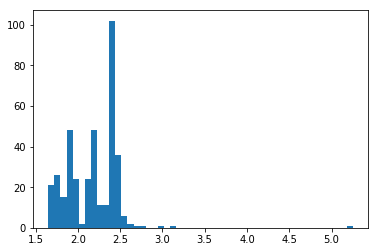

In [149]:
import matplotlib.pyplot as plt
plt.hist(df_sofr["RATE"], bins=50)
plt.show()

In [150]:
df_libor["observation_date"]= pd.to_datetime(df_libor["observation_date"], errors='coerce', infer_datetime_format=False)
df_libor.dtypes
df_libor=df_libor.sort_values(by=['observation_date'])
df_libor.head()

,observation_date,USDONTD156N
0,2018-04-03,1.69938
1,2018-04-04,1.70188
2,2018-04-05,1.70313
3,2018-04-06,1.70313
4,2018-04-09,1.70188


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


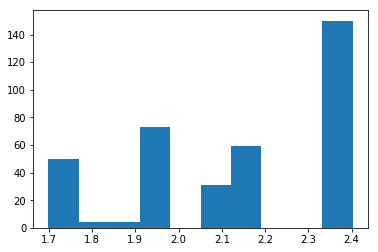

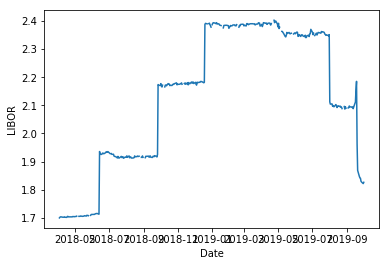

In [151]:
plt.hist(df_libor["USDONTD156N"], bins=10)
plt.show()
x=df_libor['observation_date']
y=df_libor['USDONTD156N']
plt.plot(x,y)
plt.xlabel("Date")
plt.ylabel("LIBOR")
plt.show()

3.1 Data Merge of SOFR and LIBOR 

In [166]:
df_merge=pd.DataFrame(df_sofr['DATE'])
df_merge['SOFR']=df_sofr['RATE']
df_merge.dtypes

DATE    datetime64[ns]
SOFR           float64
dtype: object

In [176]:
def check(d1):
  temp=-1
  #d1=pd.to_datetime(d1, errors='coerce', infer_datetime_format=False)
  temp=df_libor.loc[df_libor['observation_date']==d1]['USDONTD156N']
  m1=temp.mean()
  return m1
df_merge['LIBOR']=df_merge['DATE'].map(lambda x: check(x) if check(x)>0 else np.nan)
df_merge.head()

,DATE,SOFR,LIBOR
380,2018-04-02,1.80,NaN
379,2018-04-03,1.83,1.69938
378,2018-04-04,1.74,1.70188
377,2018-04-05,1.75,1.70313
376,2018-04-06,1.75,1.70313


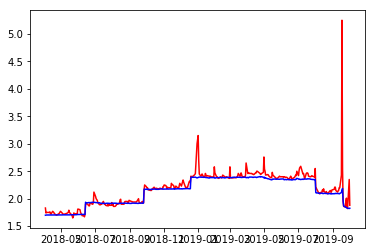

<Figure size 72x72 with 0 Axes>

In [185]:
df_merge=df_merge.dropna()
df_merge.head()
plt.plot(df_merge['DATE'],df_merge['SOFR'],'r')
plt.plot(df_merge['DATE'],df_merge['LIBOR'],'b')
plt.show()

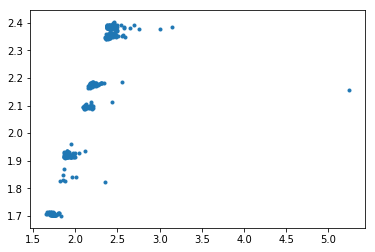

0.8286103092401026


In [201]:
# Pearson Coeffecient between SOFR and LIBOR 
plt.scatter(df_merge['SOFR'], df_merge['LIBOR'], marker='.')
plt.show()
coff=np.corrcoef(df_merge['SOFR'],df_merge['LIBOR'])[0,1]
print(coff)


In [0]:
Statistical Analysis of SOFR and LOG SOFR data
- Use standard packages of Python or R for Descriptive Statistics of SOFR and Log SOFR


In [190]:
df_merge['LOGSOFR']=np.log(df_merge['SOFR'])
df_merge.head()
df_merge.describe()

,SOFR,LIBOR,LOGSOFR
count,369.000000,369.000000,369.000000
mean,2.179431,2.127810,0.769561
std,0.315776,0.244285,0.136291
min,1.650000,1.699380,0.500775
25%,1.920000,1.918130,0.652325
50%,2.200000,2.175380,0.788457
75%,2.400000,2.362750,0.875469
max,5.250000,2.402750,1.658228


- Is the distribution normal, check AD Test for Normality?

In [208]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(27606)
# generate univariate observations
data = df_merge['SOFR']
# normality test
result = anderson(data)
anderson(data)


AndersonResult(statistic=9.082341914859853, critical_values=array([0.57 , 0.649, 0.779, 0.908, 1.08 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [209]:
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 9.082
15.000: 0.570, data does not look normal (reject H0)
10.000: 0.649, data does not look normal (reject H0)
5.000: 0.779, data does not look normal (reject H0)
2.500: 0.908, data does not look normal (reject H0)
1.000: 1.080, data does not look normal (reject H0)


- Check for the fat tails in the distribution: Look at the Q-Q plot. Further, compare the distribution against
Gaussian and Student-t distribution?

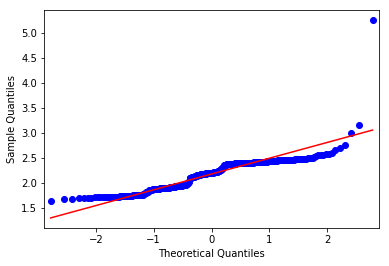

In [211]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(27606)
# generate univariate observations
data = df_merge['SOFR']
# q-q plot
qqplot(data, line='s')
pyplot.show()

- Check whether SOFR is mean-reverting?